<h1>Chapter 1: Exploratory Data Analysis

Data types:
1) Numeric:<br>
    i) Continuous<br>
    ii) Discrete<br><br>
2) Categorical:<br>
    i) Binary<br>
    ii) Ordinal<br>

Rectangular data is the general term for a two-dimensional matrix with rows indicat‐ ing records (cases) and columns indicating features (variables); data frame is the specific format in R and Python.

In python, dataframes can be manipulated and interacted with, by making use of a python module called <b>pandas</b>.
 

<h3>Estimates of location</h3>
Mean<br>
Weighted Mean<br>
Median<br>
Percentile<br>
Weighted median<br>
Trimmed mean<br>

In [2]:
import pandas as pd
import numpy as np
import wquantiles
from scipy.stats import trim_mean

lst = [1,4,3,5,6,11,8,6,10]
df = pd.DataFrame(sorted(lst))
print("mean:", df[0].mean())
print("trimmed mean: ", trim_mean(df[0], 0.3))
print("median:", df[0].median())

df_array = np.array(lst)
#the weights are the numbers in the array itself
print("weighted mean: ", np.average(df_array, weights=df_array))

sum = 0
for i in df_array:
    #calculating every element multiplied by itself
    sum = sum + i*i
print("Verification: ", sum/df_array.sum())

print("\nSorted array:", sorted(lst))
quan = np.quantile(df_array, 0.25)
print(quan)

mean: 6.0
trimmed mean:  5.8
median: 6.0
weighted mean:  7.555555555555555
Verification:  7.555555555555555

Sorted array: [1, 3, 4, 5, 6, 6, 8, 10, 11]
4.0


<h3>Estimates of variability</h3>
Deviations<br>
Variance<br>
Standard deviation<br>
Mean absolute deviation<br>
Median absolute deviation from the median<br>
Range<br>
Order statistics<br>
Percentile<br>
Interquartile range<br>

In [3]:
from statsmodels import robust

print("Standard deviation: ", df[0].std())
print("75% percentile: ", df[0].quantile(0.75))
print("25% percentile: ", df[0].quantile(0.25))
print("IQR: ", df[0].quantile(0.75) - df[0].quantile(0.25))
print("Median absolute deviation: ", robust.scale.mad(df[0]))


Standard deviation:  3.24037034920393
75% percentile:  8.0
25% percentile:  4.0
IQR:  4.0
Median absolute deviation:  2.965204437011204


<h3>Exploring the Data Distribution</h3>
Boxplot<br>
Frequency table<br>
Histogram<br>
Density plot<br>

In [4]:
#print("Array: ", df[0])
print("Percentiles and their values")
df[0].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


Percentiles and their values


0.05     1.8
0.25     4.0
0.50     6.0
0.75     8.0
0.95    10.6
Name: 0, dtype: float64

Boxplots!


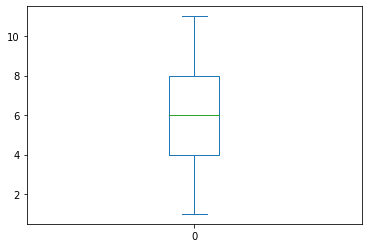

In [23]:
y = df[0].plot.box()
print("Boxplots!")

In [19]:
binned_pop = pd.cut(df[0], 3)
print(binned_pop)
print("\nFrom my understanding, the binning that happens here is equal width binning.\n[min + w], [min + 2w], ... where w =  (max - min)/number of bins")
binned_pop.value_counts()

0     (0.99, 4.333]
1     (0.99, 4.333]
2     (0.99, 4.333]
3    (4.333, 7.667]
4    (4.333, 7.667]
5    (4.333, 7.667]
6     (7.667, 11.0]
7     (7.667, 11.0]
8     (7.667, 11.0]
Name: 0, dtype: category
Categories (3, interval[float64, right]): [(0.99, 4.333] < (4.333, 7.667] < (7.667, 11.0]]

From my understanding, the binning that happens here is equal width binning.
[min + w], [min + 2w], ... where w =  (max - min)/number of bins


(0.99, 4.333]     3
(4.333, 7.667]    3
(7.667, 11.0]     3
Name: 0, dtype: int64

Histograms!

 The empty spaces within the graph specifies empty bins


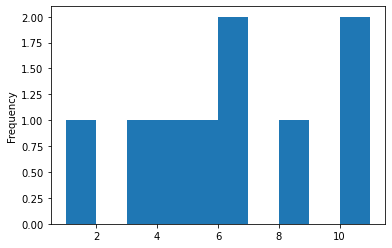

In [22]:
print("Histograms!")
y = df[0].plot.hist()
#print(y)
print("\n The empty spaces within the graph specifies empty bins")

Density plots!


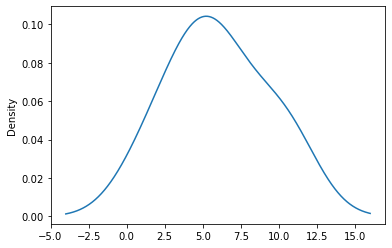

In [29]:
print("Density plots!")
y = df[0].plot.density()


<h3>Exploring binary and categorical data</h3>
Mode<br>
Expected value<br>
Bar charts<br>
Pie chats<br>

In [31]:
#making a new dataset
df1 = pd.DataFrame()
df1["categories"] = ["cat1","cat2", "cat3", "cat4", "cat5"]
df1["values"] = [25, 15, 30, 20, 10]

Text(0, 0.5, 'values')

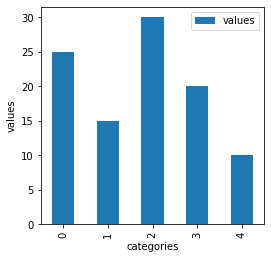

In [42]:
#We dont need to perform transpose as the dataframe is already in the format that is required
y = df1.plot.bar(figsize = (4,4))
y.set_xlabel("categories")
y.set_ylabel("values")

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents dif‐ ferent categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a
bar chart, the bars are shown separate from one another.

Expected value can be calculated as weighted mean.<br>
Multiply each outcome by its probability of occurrence -> Sum these values.

<h3>Correlation</h3>
Correlation coefficient<br>
Correlation matrix<br>
Scatterplot